In [78]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report


In [86]:
texts = ["troll2 is great", "gymkata is great", "this movie is bad", "I don't like this film"]
labels = [1, 1, 0, 0]  # 1: positive, 0: negative

# Tokenization
max_words = 1000  # Maximum number of words in the vocabulary
max_len = 10  # Maximum sentence length

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

data = pad_sequences(sequences, maxlen=max_len)
labels = np.array(labels)


In [91]:
# X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.25, random_state=42)

# Build a simple CNN model
embedding_dim = 50

model = Sequential()
embedding_layer = Embedding(input_dim=max_words, output_dim=embedding_dim)
model.add(embedding_layer)
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_10         │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [94]:
def plot_embeddings(embeddings, word_index, title):
    words = list(word_index.keys())[:100]  # limit to first 100 words for clarity
    vectors = embeddings[1:len(words) + 1]  # Skip the zero padding index (index 0)

    tsne = TSNE(n_components=2, random_state=42)
    reduced_vectors = tsne.fit_transform(vectors)

    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
        plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))
    plt.title(title)
    plt.show()


In [95]:
embeddings_before = embedding_layer.get_weights()[0]

# Plot word embeddings before training
plot_embeddings(embeddings_before, word_index, title="Word Embeddings Before Training")


IndexError: list index out of range

In [18]:
history = model.fit(X_train, y_train, epochs=60, batch_size=2, validation_data=(X_val, y_val), verbose=2)


Epoch 1/60
2/2 - 3s - 1s/step - accuracy: 0.6667 - loss: 0.6540 - val_accuracy: 0.0000e+00 - val_loss: 0.7592
Epoch 2/60
2/2 - 0s - 43ms/step - accuracy: 0.6667 - loss: 0.6913 - val_accuracy: 0.0000e+00 - val_loss: 0.7713
Epoch 3/60
2/2 - 0s - 43ms/step - accuracy: 0.6667 - loss: 0.7110 - val_accuracy: 0.0000e+00 - val_loss: 0.7767
Epoch 4/60
2/2 - 0s - 43ms/step - accuracy: 0.6667 - loss: 0.6818 - val_accuracy: 0.0000e+00 - val_loss: 0.7805
Epoch 5/60
2/2 - 0s - 43ms/step - accuracy: 0.6667 - loss: 0.5616 - val_accuracy: 0.0000e+00 - val_loss: 0.7872
Epoch 6/60
2/2 - 0s - 40ms/step - accuracy: 0.6667 - loss: 0.6319 - val_accuracy: 0.0000e+00 - val_loss: 0.7952
Epoch 7/60
2/2 - 0s - 45ms/step - accuracy: 0.6667 - loss: 0.5363 - val_accuracy: 0.0000e+00 - val_loss: 0.7993
Epoch 8/60
2/2 - 0s - 41ms/step - accuracy: 0.6667 - loss: 0.5288 - val_accuracy: 0.0000e+00 - val_loss: 0.7873
Epoch 9/60
2/2 - 0s - 45ms/step - accuracy: 0.6667 - loss: 0.5428 - val_accuracy: 0.0000e+00 - val_loss: 0

In [19]:
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
print(f'Validation Accuracy: {val_accuracy:.4f}, Validation Loss: {val_loss:.4f}')


Validation Accuracy: 1.0000, Validation Loss: 0.6118


In [100]:
new_texts = ["is don't great", "gymkata is great", "this movie is bad", "I don't like this film"]
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_data = pad_sequences(new_sequences, maxlen=max_len)


In [101]:

predictions = model.predict(new_data)
predictions_binary = (predictions > 0.5).astype(int)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


In [102]:

print("Predictions:", predictions_binary.flatten())
print("Classification Report:")
# print(classification_report([1, 0], predictions_binary.flatten(), target_names=['Negative', 'Positive']))


Predictions: [0 1 0 0]
Classification Report:


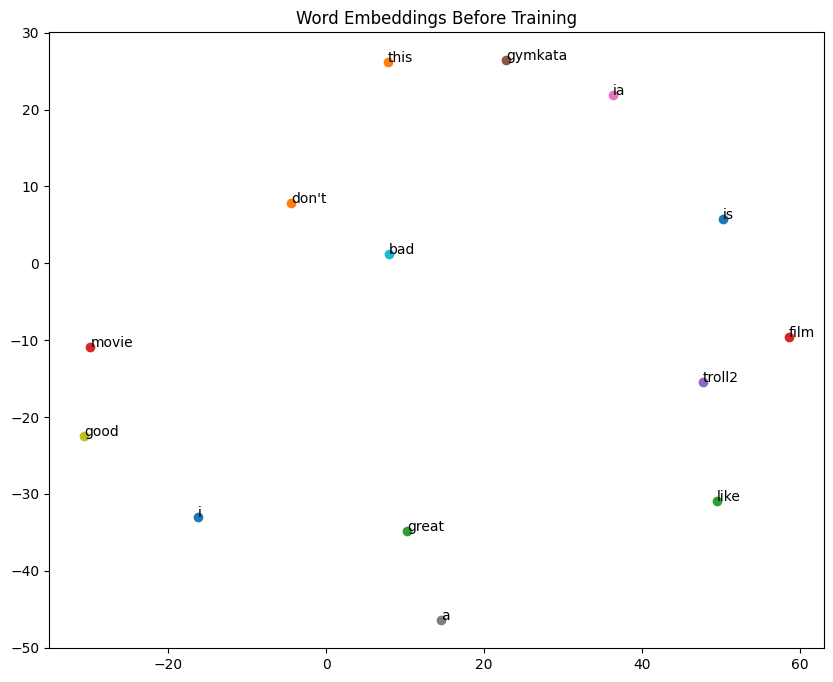

Epoch 1/100
3/3 - 1s - 334ms/step - accuracy: 0.8000 - loss: 0.6840
Epoch 2/100
3/3 - 0s - 15ms/step - accuracy: 1.0000 - loss: 0.6631
Epoch 3/100
3/3 - 0s - 15ms/step - accuracy: 0.2000 - loss: 0.6919
Epoch 4/100
3/3 - 0s - 17ms/step - accuracy: 1.0000 - loss: 0.6356
Epoch 5/100
3/3 - 0s - 16ms/step - accuracy: 1.0000 - loss: 0.6515
Epoch 6/100
3/3 - 0s - 15ms/step - accuracy: 1.0000 - loss: 0.5931
Epoch 7/100
3/3 - 0s - 15ms/step - accuracy: 0.6000 - loss: 0.6473
Epoch 8/100
3/3 - 0s - 15ms/step - accuracy: 1.0000 - loss: 0.5618
Epoch 9/100
3/3 - 0s - 16ms/step - accuracy: 1.0000 - loss: 0.5551
Epoch 10/100
3/3 - 0s - 16ms/step - accuracy: 0.8000 - loss: 0.5712
Epoch 11/100
3/3 - 0s - 20ms/step - accuracy: 1.0000 - loss: 0.5705
Epoch 12/100
3/3 - 0s - 16ms/step - accuracy: 1.0000 - loss: 0.5176
Epoch 13/100
3/3 - 0s - 16ms/step - accuracy: 1.0000 - loss: 0.4927
Epoch 14/100
3/3 - 0s - 16ms/step - accuracy: 0.4000 - loss: 0.6119
Epoch 15/100
3/3 - 0s - 15ms/step - accuracy: 1.0000 - l

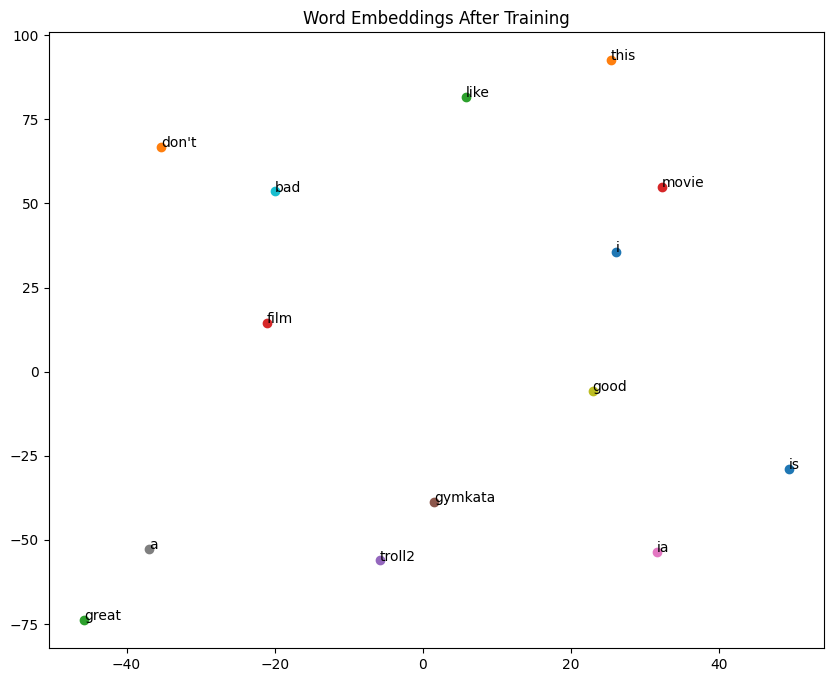

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Sample data
texts = ["troll2 is great", "gymkata is great","this ia a good movie", "this movie is bad", "I don't like this film"]
labels = [1, 1,1, 0, 0]  # 1: positive, 0: negative

# Tokenization
max_words = 1000  # Maximum number of words in the vocabulary
max_len = 10  # Maximum sentence length

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

data = pad_sequences(sequences, maxlen=max_len)
labels = np.array(labels)

# Build a simple CNN model
embedding_dim = 50

model = Sequential()
embedding_layer = Embedding(input_dim=max_words, output_dim=embedding_dim)
model.add(embedding_layer)
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Perform a single forward pass to initialize the embeddings
model.train_on_batch(data, labels)  # Run a single batch training step

# Function to plot embeddings
def plot_embeddings(embeddings, word_index, title):
    words = list(word_index.keys())[:30]  # Limit to first 30 words for clarity
    vectors = embeddings[1:len(words) + 1]  # Skip the zero padding index (index 0)

    # Set perplexity less than the number of samples
    tsne = TSNE(n_components=2, perplexity=min(5, len(vectors) - 1), random_state=42)
    reduced_vectors = tsne.fit_transform(vectors)

    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words):
        plt.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
        plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))
    plt.title(title)
    plt.show()

# Get embeddings before training
embeddings_before = embedding_layer.get_weights()[0]

# Plot word embeddings before training
plot_embeddings(embeddings_before, word_index, title="Word Embeddings Before Training")

# Train the model
model.fit(data, labels, epochs=100, batch_size=2, verbose=2)

# Get embeddings after training
embeddings_after = embedding_layer.get_weights()[0]

# Plot word embeddings after training
plot_embeddings(embeddings_after, word_index, title="Word Embeddings After Training")


In [105]:
new_texts = ["is don't great", "gymkata is great", "this movie is bad", "I don't like this film"]
new_sequences = tokenizer.texts_to_sequences(new_texts)
new_data = pad_sequences(new_sequences, maxlen=max_len)

predictions = model.predict(new_data)
predictions_binary = (predictions > 0.5).astype(int)

print("Predictions:", predictions_binary.flatten())
print("Classification Report:")
# print(classification_report([1, 0], predictions_binary.flatten(), target_names=['Negative', 'Positive']))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
Predictions: [0 1 0 0]
Classification Report:


Epoch 1/100
3/3 - 1s - 312ms/step - accuracy: 0.4000 - loss: 0.7060
Epoch 2/100
3/3 - 0s - 9ms/step - accuracy: 0.8000 - loss: 0.6922
Epoch 3/100
3/3 - 0s - 10ms/step - accuracy: 0.6000 - loss: 0.6947
Epoch 4/100
3/3 - 0s - 9ms/step - accuracy: 0.8000 - loss: 0.6836
Epoch 5/100
3/3 - 0s - 10ms/step - accuracy: 0.8000 - loss: 0.6774
Epoch 6/100
3/3 - 0s - 9ms/step - accuracy: 0.6000 - loss: 0.6817
Epoch 7/100
3/3 - 0s - 9ms/step - accuracy: 0.6000 - loss: 0.6728
Epoch 8/100
3/3 - 0s - 9ms/step - accuracy: 0.8000 - loss: 0.6756
Epoch 9/100
3/3 - 0s - 10ms/step - accuracy: 0.6000 - loss: 0.6693
Epoch 10/100
3/3 - 0s - 10ms/step - accuracy: 0.6000 - loss: 0.6664
Epoch 11/100
3/3 - 0s - 11ms/step - accuracy: 0.6000 - loss: 0.6605
Epoch 12/100
3/3 - 0s - 8ms/step - accuracy: 0.6000 - loss: 0.6521
Epoch 13/100
3/3 - 0s - 8ms/step - accuracy: 1.0000 - loss: 0.6536
Epoch 14/100
3/3 - 0s - 9ms/step - accuracy: 0.6000 - loss: 0.6353
Epoch 15/100
3/3 - 0s - 9ms/step - accuracy: 1.0000 - loss: 0.60

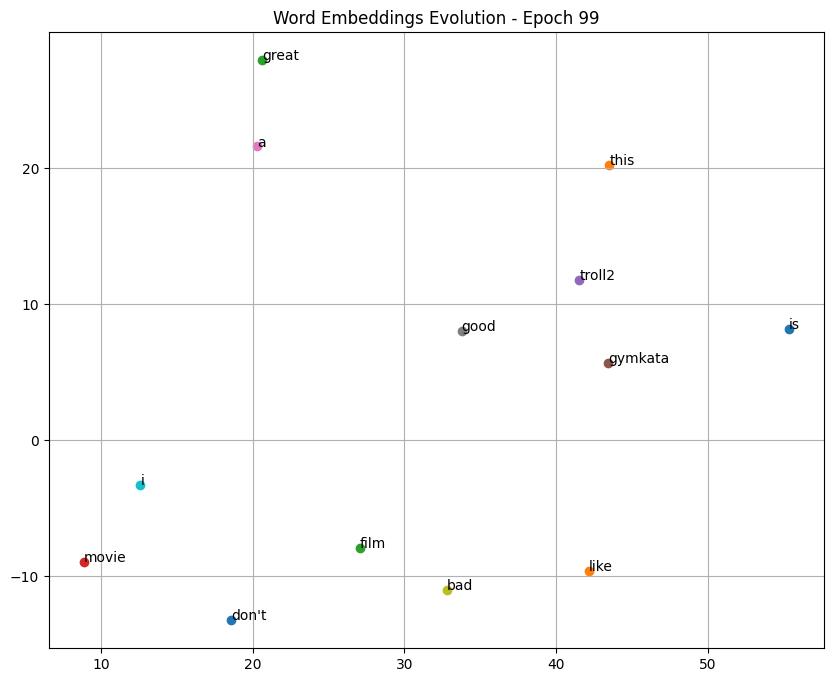

In [116]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import Callback
import matplotlib.animation as animation

# Sample data
texts = ["troll2 is great", "gymkata is great", "this is a good movie", "this movie is bad", "I don't like this film"]
labels = [1, 1, 1, 0, 0]  # 1: positive, 0: negative

# Tokenization
max_words = 1000  # Maximum number of words in the vocabulary
max_len = 10  # Maximum sentence length

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

data = pad_sequences(sequences, maxlen=max_len)
labels = np.array(labels)

# Build a simple CNN model
embedding_dim = 50

model = Sequential()
embedding_layer = Embedding(input_dim=max_words, output_dim=embedding_dim)
model.add(embedding_layer)
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Custom callback to save embeddings at each epoch
class EmbeddingLogger(Callback):
    def __init__(self, embedding_layer, word_index, interval=1):
        super().__init__()
        self.embedding_layer = embedding_layer
        self.word_index = word_index
        self.interval = interval
        self.embeddings_history = []

    def on_epoch_end(self, epoch, logs=None):
        if epoch % self.interval == 0:  # Save embeddings every `interval` epochs
            embeddings = self.embedding_layer.get_weights()[0]
            self.embeddings_history.append((epoch, embeddings))

# Create callback instance
embedding_logger = EmbeddingLogger(embedding_layer, word_index, interval=1)

# Train the model with callback
model.fit(data, labels, epochs=100, batch_size=2, verbose=2, callbacks=[embedding_logger])

# Generate frames for animation
fig, ax = plt.subplots(figsize=(10, 8))

def update_plot(frame):
    ax.clear()  # Clear the previous frame
    epoch, embeddings = frame

    words = list(word_index.keys())[:30]  # Limit to first 30 words for clarity
    vectors = embeddings[1:len(words) + 1]  # Skip the zero padding index (index 0)

    # Set perplexity less than the number of samples
    tsne = TSNE(n_components=2, perplexity=min(5, len(vectors) - 1), random_state=42)
    reduced_vectors = tsne.fit_transform(vectors)

    for i, word in enumerate(words):
        ax.scatter(reduced_vectors[i, 0], reduced_vectors[i, 1])
        ax.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))
    ax.set_title(f"Word Embeddings Evolution - Epoch {epoch}")
    ax.grid(True)

# Create animation
ani = animation.FuncAnimation(fig, update_plot, frames=embedding_logger.embeddings_history, repeat=False)

# Save the animation as a GIF
ani.save('embeddings_evolution.gif', writer='pillow', fps=5)  # Save as GIF

plt.show()
